In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading the csv file 
teams = pd.read_csv('Teams.csv')
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [2]:
## Selecting variables and seasons of interest
my_teams = teams.loc[teams['yearID'] > 2000, ['teamID', 'yearID', 'lgID', 'G', 'W', 'L', 'R', 'RA']]
my_teams.head()

,teamID,yearID,lgID,G,W,L,R,RA
2355,ANA,2001,AL,162,75,87,691,730
2356,ARI,2001,NL,162,92,70,818,677
2357,ATL,2001,NL,162,88,74,729,643
2358,BAL,2001,AL,162,63,98,687,829
2359,BOS,2001,AL,161,82,79,772,745


In [3]:
## Computing RD and Wpct
my_teams['RD'] = my_teams['R'] - my_teams['RA']
my_teams['Wpct'] = my_teams['W'] / (my_teams['W'] + my_teams['L'])
my_teams.head()

,teamID,yearID,lgID,G,W,L,R,RA,RD,Wpct
2355,ANA,2001,AL,162,75,87,691,730,-39,0.462963
2356,ARI,2001,NL,162,92,70,818,677,141,0.567901
2357,ATL,2001,NL,162,88,74,729,643,86,0.543210
2358,BAL,2001,AL,162,63,98,687,829,-142,0.391304
2359,BOS,2001,AL,161,82,79,772,745,27,0.509317


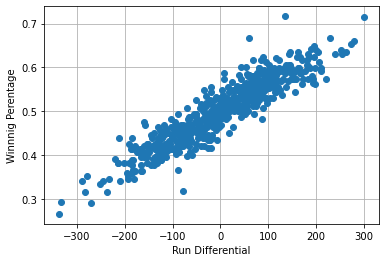

In [4]:
## Visualizing RD and Wpct
plt.plot('RD', 'Wpct', 'o', data = my_teams)
plt.xlabel('Run Differential')
plt.ylabel('Winnnig Perentage')
plt.grid()

plt.show()